# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

## Objectives:
- **Pertemuan 12**: Master data cleaning and preparation techniques using Pandas.
- **Pertemuan 13**: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.


In [ ]:
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Assign directly
df['Salary'] = df['Salary'].fillna(df['Salary'].median())  # Assign directly
df = df.dropna(subset=['Name'])  # Reassign after dropping rows
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


In [ ]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', None],
    'Math': [85, 90, None, 85, 70],
    'Science': [88, 76, 92, 88, None],
    'Grade': ['A', 'B', 'A', 'A', None]
}

df = pd.DataFrame(data)

print("\nMissing Values:")
print(df.isnull().sum())

df['Math'] = df['Math'].fillna(df['Math'].mean())
df['Science'] = df['Science'].fillna(df['Science'].mean())

numerical_cols = ['Math', 'Science']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df['Name'] = df['Name'].str.lower()
df['Grade'] = df['Grade'].str.lower()
df = pd.get_dummies(df, columns=['Grade'], drop_first=True)

df = df.dropna(subset=['Name'])

df = df.drop_duplicates()

print("\nFinal Cleaned Dataset:")
print(df)



Missing Values:
Name       1
Math       1
Science    1
Grade      1
dtype: int64

Final Cleaned Dataset:
      Name   Math  Science  Grade_b
0    alice  0.750     0.75    False
1      bob  1.000     0.00     True
2  charlie  0.625     1.00    False


## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.


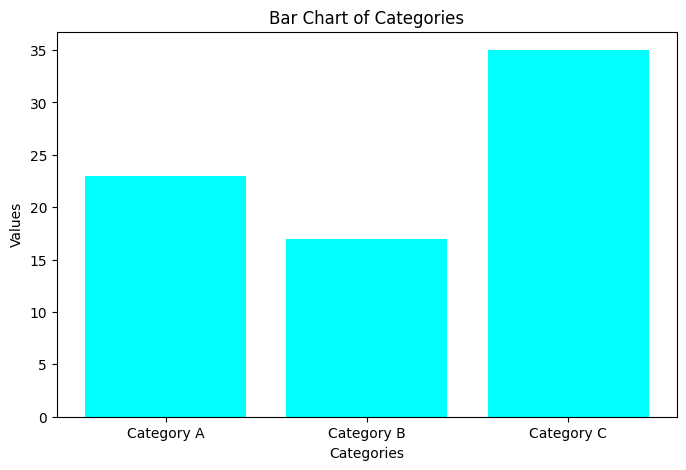

In [ ]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


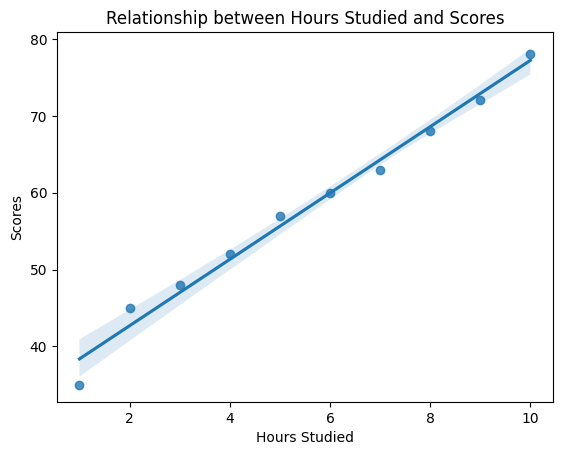

In [ ]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.
- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.


In [78]:
from google.colab import files

uploaded = files.upload()

import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data.csv')

df.columns = df.columns.str.replace('\xa0', ' ', regex=False)

def clean_text(text):
    text = re.sub(r"\[\s*.*?\s*\]", "" , text)
    text = re.sub(r"[^a-zA-Z0-9]", "" , text)
    return text
columns = ["Actual gross" , "Adjusted gross (in 2022 dollars)" , "Average gross"]
for column in columns:
    df[column] = df[column].apply(clean_text)

def clean_peak(text):
    if not pd.isna(text):
        text =  re.sub(r"\[\s*.*?\s*\]", "" , text)
    return text
columns = ["Peak" , "All Time Peak"]
for column in columns:
    df[column] = df[column].apply(clean_peak)

def clean_title(text):
    text =  re.sub(r"[^a-zA-Z ]", "" , text)
    return text
df["Tour title"] = df["Tour title"].apply(clean_title)

df["Ref."] = df["Ref."].replace("1516" , "16")
df["Ref."] = df["Ref."].replace("d" , "5")

numeric_cols = ["Actual gross" , "Adjusted gross (in 2022 dollars)"
                , "Average gross" , "Shows"]
for cols in numeric_cols :
    df[cols] = df[cols].astype("float")

columns_to_drop = ["All Time Peak", "Peak", "Ref."]
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)
df

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,2023–2024,56.0,13928571.0
1,2,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,2023,56.0,10353571.0
2,3,411000000.0,560622615.0,Madonna,Sticky Sweet Tour a,2008–2009,85.0,4835294.0
3,4,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,2018–2019,156.0,2546795.0
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,2018,53.0,6522173.0
5,6,305158363.0,388978496.0,Madonna,The MDNA Tour,2012,88.0,3467709.0
6,7,280000000.0,381932682.0,Celine Dion,Taking Chances World Tour,2008–2009,131.0,2137405.0
7,7,257600000.0,257600000.0,Pink,Summer Carnival,2023–2024,41.0,6282927.0
8,9,256084556.0,312258401.0,Beyoncé,The Formation World Tour,2016,49.0,5226215.0
9,10,250400000.0,309141878.0,Taylor Swift,The World Tour,2015,85.0,2945882.0


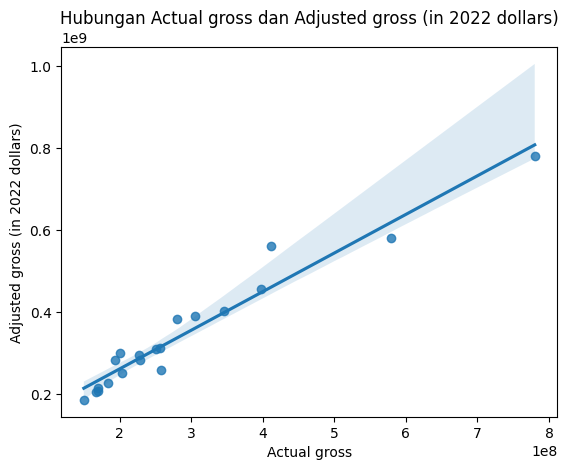

In [79]:
sns.regplot( x='Actual gross', y='Adjusted gross (in 2022 dollars)', data=df)
plt.title('Hubungan Actual gross dan Adjusted gross (in 2022 dollars)')
plt.show()

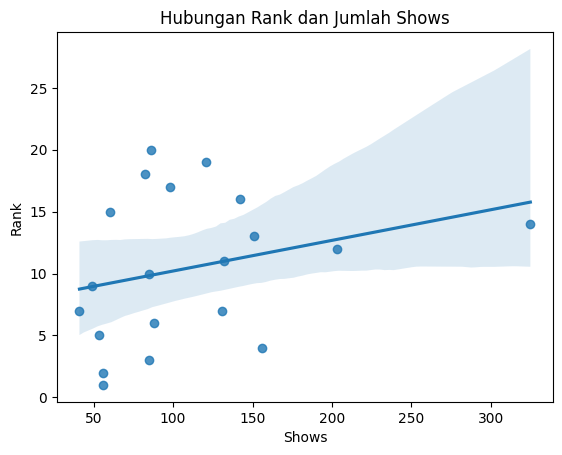

In [80]:
sns.regplot( x='Shows', y='Rank', data=df)
plt.title('Hubungan Rank dan Jumlah Shows')
plt.show()

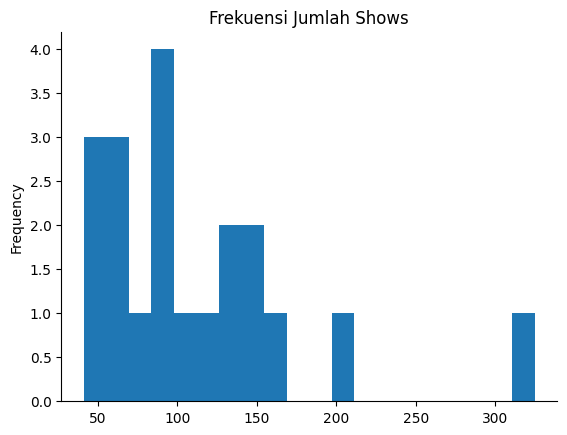

In [82]:
df['Shows'].plot(kind='hist', bins=20, title='Shows')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Frekuensi Jumlah Shows')
plt.show()

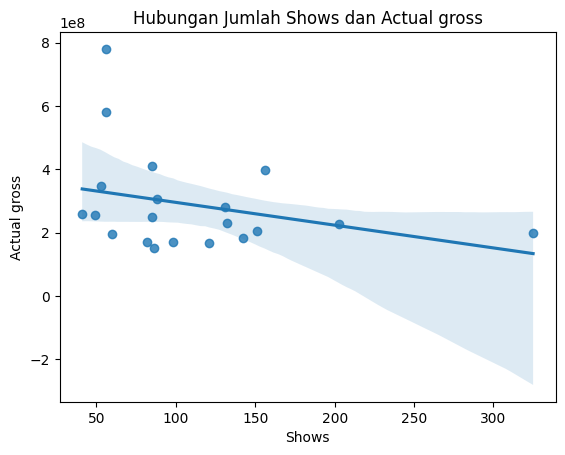

In [84]:
sns.regplot( x='Shows', y='Actual gross', data=df)
plt.title('Hubungan Jumlah Shows dan Actual gross')
plt.show()